# Basics of Neural Networks and Deep Learning

## Setup

In [1]:
import os

## adapt this directory to your needs
base_dir = '../'
notebook_dir = os.path.join(base_dir, 'Exercise')
data_dir = os.path.join(base_dir, 'DataSets')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

import tensorflow as tf

from pyMLaux import plot_2d_prediction, plot_history, show_img_data, evaluate_classification_result

## Simple Neural Networks Applied to the Fish Data Set

In [374]:
fish_data_raw = pd.read_csv(os.path.join(data_dir, 'fish.csv')) 
fish_data = {'data': np.array(fish_data_raw.iloc[:, :-1]),
             'target': (np.array(fish_data_raw.iloc[:, -1]) + 1) / 2,
             'feature_names': fish_data_raw.columns[:-1],
             'target_names': ['Salmon', 'Sea bass']}

In [375]:
X_train, X_test, y_train, y_test = train_test_split(fish_data['data'], fish_data['target'],
                                                    test_size=0.3, random_state=4232)

In [376]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(fish_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='sgd',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [377]:
model1.summary()

Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_206 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [378]:
history = model1.fit(x=X_train, y=y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Epoch 1/200
91/91 - 1s - 6ms/step - accuracy: 0.5934 - loss: 0.6402 - val_accuracy: 0.6923 - val_loss: 0.6369
Epoch 2/200
91/91 - 0s - 1ms/step - accuracy: 0.7473 - loss: 0.6302 - val_accuracy: 0.7949 - val_loss: 0.6264
Epoch 3/200
91/91 - 0s - 1ms/step - accuracy: 0.7802 - loss: 0.6229 - val_accuracy: 0.8462 - val_loss: 0.6180
Epoch 4/200
91/91 - 0s - 1ms/step - accuracy: 0.8022 - loss: 0.6164 - val_accuracy: 0.8462 - val_loss: 0.6106
Epoch 5/200
91/91 - 0s - 1ms/step - accuracy: 0.8022 - loss: 0.6108 - val_accuracy: 0.8462 - val_loss: 0.6043
Epoch 6/200
91/91 - 0s - 1ms/step - accuracy: 0.8462 - loss: 0.6057 - val_accuracy: 0.8462 - val_loss: 0.5988
Epoch 7/200
91/91 - 0s - 1ms/step - accuracy: 0.8571 - loss: 0.6008 - val_accuracy: 0.8462 - val_loss: 0.5937
Epoch 8/200
91/91 - 0s - 1ms/step - accuracy: 0.8571 - loss: 0.5959 - val_accuracy: 0.8718 - val_loss: 0.5889
Epoch 9/200
91/91 - 0s - 1ms/step - accuracy: 0.8571 - loss: 0.5911 - val_accuracy: 0.8462 - val_loss: 0.5838
Epoch 10/2

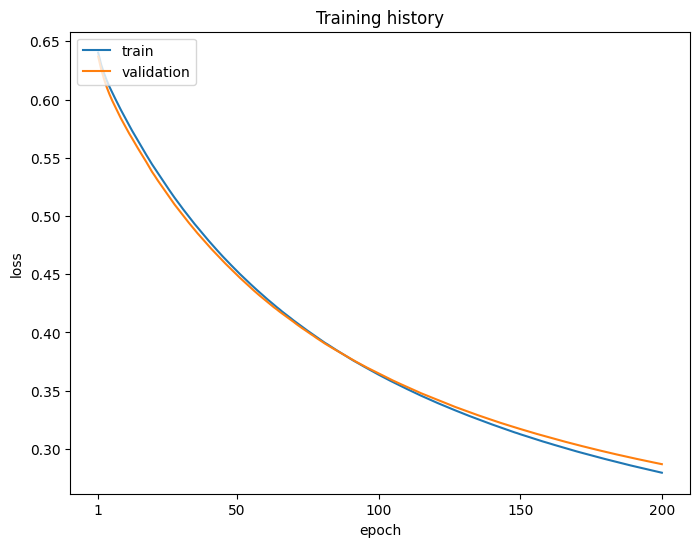

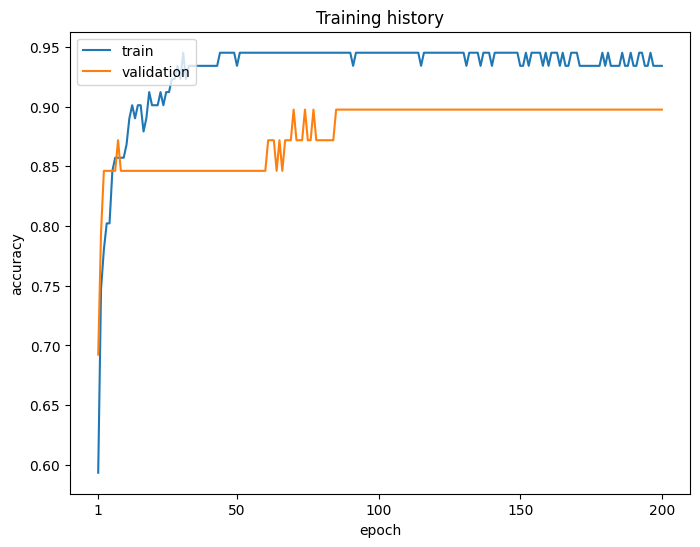

In [379]:
plot_history(history)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


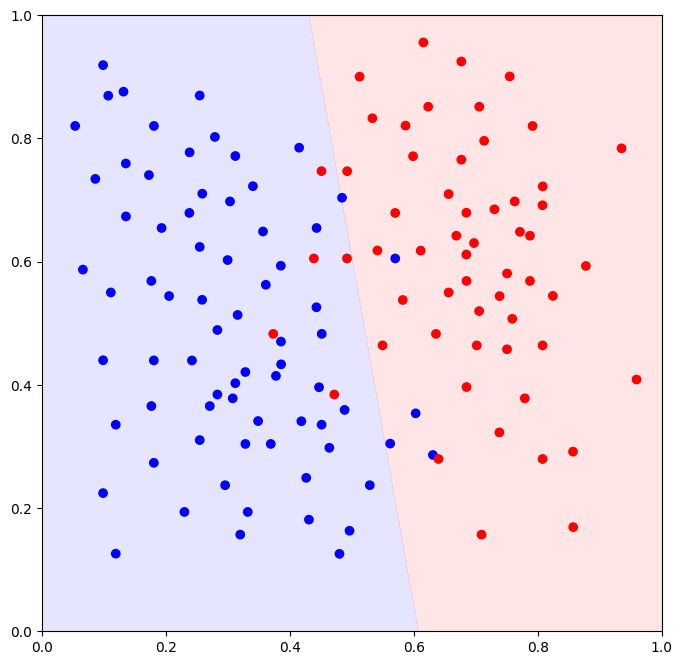

In [380]:
plot_2d_prediction(fish_data['data'], fish_data['target'], model1.predict, midval=0.5,
                   xval=np.linspace(0, 1, 101), yval=np.linspace(0, 1, 101))

In [381]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(fish_data['data'].shape[1], )),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [382]:
model2.summary()

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_207 (Dense)               │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [383]:
history = model2.fit(x=X_train, y=y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Epoch 1/200
91/91 - 1s - 6ms/step - accuracy: 0.4286 - loss: 0.7115 - val_accuracy: 0.2051 - val_loss: 0.7036
Epoch 2/200
91/91 - 0s - 1ms/step - accuracy: 0.3407 - loss: 0.7046 - val_accuracy: 0.5897 - val_loss: 0.6965
Epoch 3/200
91/91 - 0s - 1ms/step - accuracy: 0.4945 - loss: 0.7023 - val_accuracy: 0.5897 - val_loss: 0.6927
Epoch 4/200
91/91 - 0s - 1ms/step - accuracy: 0.5495 - loss: 0.7010 - val_accuracy: 0.5897 - val_loss: 0.6917
Epoch 5/200
91/91 - 0s - 1ms/step - accuracy: 0.5495 - loss: 0.7000 - val_accuracy: 0.5897 - val_loss: 0.6905
Epoch 6/200
91/91 - 0s - 1ms/step - accuracy: 0.5495 - loss: 0.6987 - val_accuracy: 0.5897 - val_loss: 0.6889
Epoch 7/200
91/91 - 0s - 1ms/step - accuracy: 0.5495 - loss: 0.6972 - val_accuracy: 0.5897 - val_loss: 0.6868
Epoch 8/200
91/91 - 0s - 1ms/step - accuracy: 0.5495 - loss: 0.6955 - val_accuracy: 0.5897 - val_loss: 0.6878
Epoch 9/200
91/91 - 0s - 1ms/step - accuracy: 0.5495 - loss: 0.6952 - val_accuracy: 0.5897 - val_loss: 0.6855
Epoch 10/2

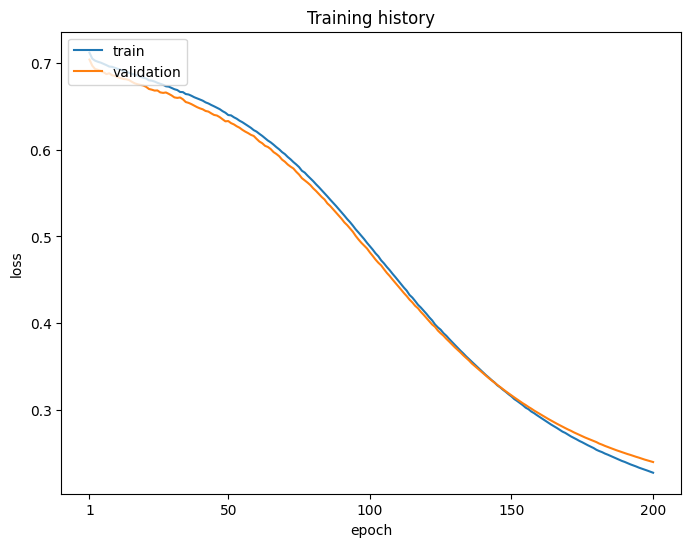

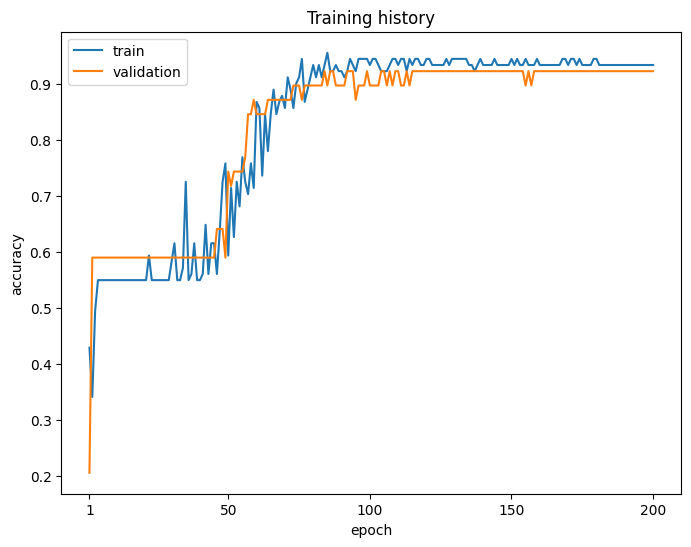

In [384]:
plot_history(history)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


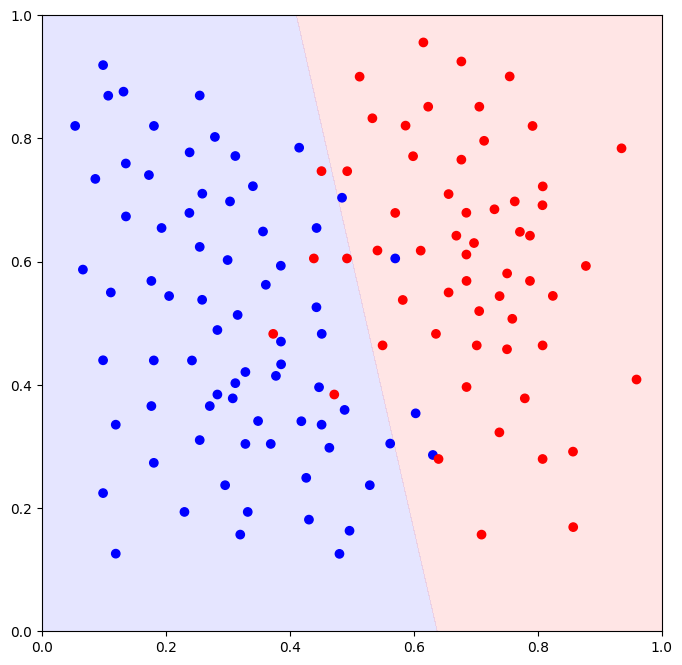

In [385]:
plot_2d_prediction(fish_data['data'], fish_data['target'], model2.predict, midval=0.5,
                   xval=np.linspace(0, 1, 101), yval=np.linspace(0, 1, 101))

## Simple Neural Networks Applied to the Iris Data Set

In [386]:
iris_data = datasets.load_iris(return_X_y=False)

In [387]:
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'],
                                                    test_size=0.3, random_state=4232)

In [388]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(iris_data['data'].shape[1], )),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model3.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [389]:
model3.summary()

Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_209 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [390]:
history = model3.fit(x=X_train, y=y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Epoch 1/100
105/105 - 1s - 5ms/step - accuracy: 0.1714 - loss: 1.2034 - val_accuracy: 0.3778 - val_loss: 1.1010
Epoch 2/100
105/105 - 0s - 1ms/step - accuracy: 0.2667 - loss: 1.1262 - val_accuracy: 0.2444 - val_loss: 1.1225
Epoch 3/100
105/105 - 0s - 1ms/step - accuracy: 0.3333 - loss: 1.1145 - val_accuracy: 0.4889 - val_loss: 1.0902
Epoch 4/100
105/105 - 0s - 1ms/step - accuracy: 0.3524 - loss: 1.1040 - val_accuracy: 0.4222 - val_loss: 1.0766
Epoch 5/100
105/105 - 0s - 1ms/step - accuracy: 0.4000 - loss: 1.0936 - val_accuracy: 0.6222 - val_loss: 1.0795
Epoch 6/100
105/105 - 0s - 1ms/step - accuracy: 0.4667 - loss: 1.0816 - val_accuracy: 0.6444 - val_loss: 1.0616
Epoch 7/100
105/105 - 0s - 2ms/step - accuracy: 0.5810 - loss: 1.0523 - val_accuracy: 0.6222 - val_loss: 1.0531
Epoch 8/100
105/105 - 0s - 1ms/step - accuracy: 0.5429 - loss: 1.0387 - val_accuracy: 0.6222 - val_loss: 1.0303
Epoch 9/100
105/105 - 0s - 1ms/step - accuracy: 0.6286 - loss: 1.0123 - val_accuracy: 0.6222 - val_loss:

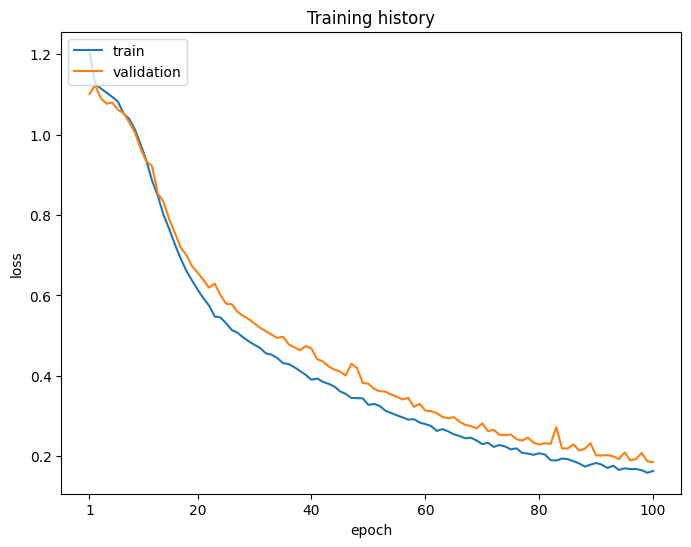

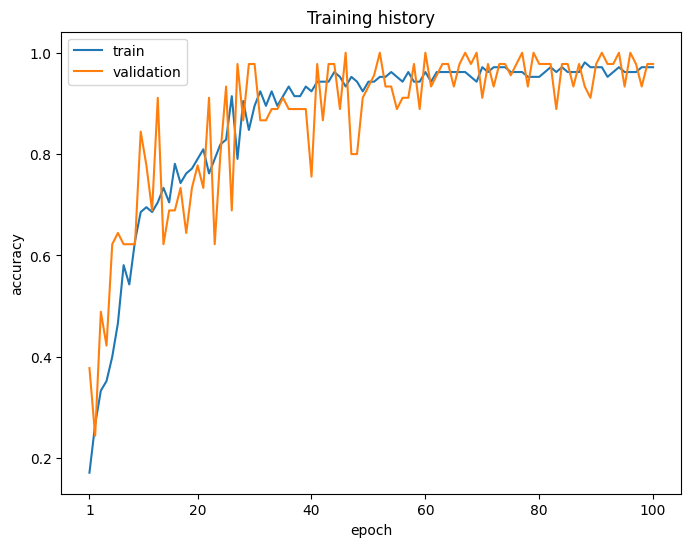

In [391]:
plot_history(history)

In [392]:
pred = model3.predict(X_test)

evaluate_classification_result(y_test, pred, classes=iris_data.target_names)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Confusion matrix (rows -> true, columns -> predicted):

            setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          17          0
virginica        0           1         16


Class setosa:
    Sensitivity (TPR): 100.000% (11 of 11)
    Specificity (TNR): 100.000% (34 of 34)
    Precision:         100.000% (11 of 11)
    Neg. pred. value:  100.000% (34 of 34)
Class versicolor:
    Sensitivity (TPR): 100.000% (17 of 17)
    Specificity (TNR):  96.429% (27 of 28)
    Precision:          94.444% (17 of 18)
    Neg. pred. value:  100.000% (27 of 27)
Class virginica:
    Sensitivity (TPR):  94.118% (16 of 17)
    Specificity (TNR): 100.000% (28 of 28)
    Precision:         100.000% (16 of 16)
    Neg. pred. value:   96.552% (28 of 29)

Overall accuracy:   97.778% (44 of 45)
Balanced accuracy:  98.039%


## Load Simple Digit Recognition Data

In [4]:
dig_train_raw = pd.read_csv(os.path.join(data_dir, 'Digits_training.csv'), sep=',')
dig_train = {'data': np.array(dig_train_raw.iloc[:, :-1]),
             'target': np.array(dig_train_raw.iloc[:, -1]),
             'feature_names': dig_train_raw.columns[:-1],
             'target_names': [str(i) for i in range(0, 10)]}

In [5]:
dig_test_raw = pd.read_csv(os.path.join(data_dir, 'Digits_test.csv'), sep=',')
dig_test = {'data': np.array(dig_test_raw.iloc[:, :-1]),
            'target': np.array(dig_test_raw.iloc[:, -1]),
            'feature_names': dig_test_raw.columns[:-1],
            'target_names': [str(i) for i in range(0, 10)]}

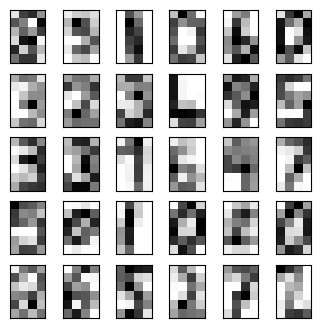

In [395]:
show_img_data(dig_train['data'].reshape((dig_train['data'].shape[0], 6, 4, 1)), figsize=(4, 4),
              interpolation=None)

In [396]:
dig_train['target'][range(0, 30)].reshape(5, 6)

array([[8, 5, 1, 0, 6, 0],
       [3, 2, 3, 4, 9, 5],
       [3, 3, 1, 6, 4, 7],
       [5, 0, 1, 0, 2, 0],
       [2, 6, 5, 2, 7, 2]])

## Traditional Multi-Layer Perceptron with Sigmoid Activation

**Results from experimenting:**
- 1 hidden layer with 10 neurons / 350 epochs / learn-rate 0.01: 85,1% validation accuracy
- 1 hidden layer with 16 neurons / 350 epochs / learn-rate 0.01: 87,2% validation accuracy
- 1 hidden layer with 32 neurons / 350 epochs / learn-rate 0.01: 88,067% validation accuracy
- 1 hidden layer with 64 neurons / 350 epochs / learn-rate 0.01: 87,6% validation accuracy
- 1 hidden layer with 128 neurons / 350 epochs / learn-rate 0.01: 87,9% validation accuracy
- 1 hidden layer with 64 neurons / 500 epochs / learn-rate 0.01: 88,6% validation accuracy
- 1 hidden layer with 128 neurons / 500 epochs / learn-rate 0.01: 88,467% validation accuracy
- 2 hidden layers with 32 and 16 neurons / 350 epochs / learn-rate 0.01: 84,167% validation accuracy
- 2 hidden layers with 128 and 64 neurons / 350 epochs / learn-rate 0.01: 85,767% validation accuracy
- 2 hidden layers with 256 and 128 neurons / 350 epochs / learn-rate 0.1: 92,515%% validation accuracy
- 2 hidden layers with 128 and 64 neurons / 350 epochs / learn-rate 0.1: 92,665% validation accuracy

**Discussion:** Sigmoid activation function is not the best choice for this problem, due to the vanishing gradient problem, as discussed in the theory section. Therefore increasing the learning rate led to a jump in the accuracy, due to the fact that the weights were updated more regularly even in the deeper layers. The best results were obtained with 2 hidden layers with 128 and 64 neurons and a learning rate of 0.1. The best accuracy was 92,665%. 

In [397]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(dig_train['data'].shape[1], )),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optim = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [398]:
model.summary()

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_211 (Dense)               │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,106 (47.29 KB)

 Trainable params: 12,106 (47.29 KB)

 Non-trainable params: 0 (0.00 B)

In [399]:
history = model.fit(x=dig_train['data'], y=dig_train['target'], epochs=350, batch_size=16, validation_split=0.2, verbose=2)

Epoch 1/350
150/150 - 1s - 4ms/step - accuracy: 0.1071 - loss: 2.3250 - val_accuracy: 0.1017 - val_loss: 2.3278
Epoch 2/350
150/150 - 0s - 1ms/step - accuracy: 0.1204 - loss: 2.2946 - val_accuracy: 0.2217 - val_loss: 2.2602
Epoch 3/350
150/150 - 0s - 1ms/step - accuracy: 0.1663 - loss: 2.2495 - val_accuracy: 0.1017 - val_loss: 2.2348
Epoch 4/350
150/150 - 0s - 1ms/step - accuracy: 0.2246 - loss: 2.1872 - val_accuracy: 0.0833 - val_loss: 2.1964
Epoch 5/350
150/150 - 0s - 1ms/step - accuracy: 0.3121 - loss: 2.0758 - val_accuracy: 0.4233 - val_loss: 1.9812
Epoch 6/350
150/150 - 0s - 1ms/step - accuracy: 0.4100 - loss: 1.8866 - val_accuracy: 0.4933 - val_loss: 1.7810
Epoch 7/350
150/150 - 0s - 1ms/step - accuracy: 0.4804 - loss: 1.6773 - val_accuracy: 0.4883 - val_loss: 1.5724
Epoch 8/350
150/150 - 0s - 1ms/step - accuracy: 0.5521 - loss: 1.4970 - val_accuracy: 0.5717 - val_loss: 1.4308
Epoch 9/350
150/150 - 0s - 1ms/step - accuracy: 0.6046 - loss: 1.3572 - val_accuracy: 0.6167 - val_loss:

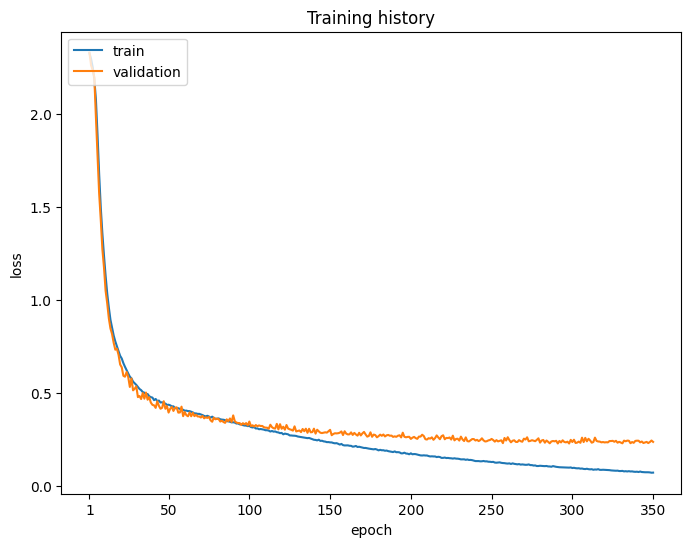

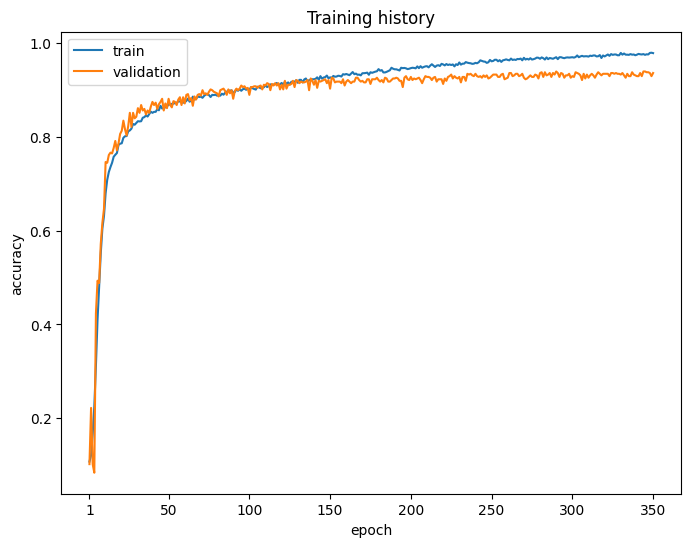

In [400]:
plot_history(history)

In [401]:
pred = model.predict(dig_test['data'])

evaluate_classification_result(dig_test['target'], pred, classes=dig_test['target_names'])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix (rows -> true, columns -> predicted):

     0    1    2    3    4    5    6    7    8    9
0  206    1    0    0    2    1    1    1    0    0
1    0  188    1    1    3    4    0    4    0    2
2    0    3  179    1    0    1    1    1    0    0
3    2    0    2  182    1    8    0    4    1    2
4    1    2    0    0  193    1    7    2    0    2
5    1    0    0    2    0  179    5    0    0    3
6    3    2    0    0    2    7  190    0    0    0
7    0    2    5    1    1    2    0  185    1    5
8    3    2    0    8    3    4    1    1  171    0
9    3    2    1    3    4    5    0    0    2  184


Class 0:
    Sensitivity (TPR):  97.170% (206 of 212)
    Specificity (TNR):  99.275% (1779 of 1792)
    Precision:          94.064% (206 of 219)
    Neg. pred. value:   99.664% (1779 of 1785)
Class 1:
    Sensitivity (TPR):  92.611% (188 of 203)
    Specificity (TNR):  99.223% (1787 of 1801)
    Precision:          93.069% (188 

## Modern Network

**Results from experimenting:**
- **Trial 1:** 4 hidden layers: 94,261% validation accuracy
  - 2 dense layers 392 and 196 neurons and relu activation
  - 2 dropout layers with 0.5 
  - 100 epochs 
  - adam with learn-rate 0.01
- **Trial 2:** 6 hidden layers: 94,212% validation accuracy
  - 3 dense layers 392, 196 and 98 neurons and relu activation
  - 3 dropout layers with 0.5 
  - 100 epochs 
  - adam with learn-rate 0.01
- **Trial 3:** 6 hidden layers: 94,461% validation accuracy
  - 3 dense layers 512, 256 and 128 neurons and relu activation
  - 3 dropout layers with 0.5 
  - 100 epochs 
  - adam with learn-rate 0.01
- **Trial 4:** 6 hidden layers: 95,11% validation accuracy
  - 3 dense layers 512, 256 and 128 neurons and relu activation
  - 3 dropout layers with 0.5 
  - 200 epochs 
  - adam with learn-rate 0.01
- **Trial 5:** 6 hidden layers: 88,573% validation accuracy
  - 3 dense layers 64, 32 and 16 neurons and relu activation
  - 3 dropout layers with 0.5 
  - 200 epochs 
  - adam with learn-rate 0.01
- **Trial 6:** 2 hidden layers: 91,267% validation accuracy
  - 2 dense layers with 32 neurons each and relu activation
  - 200 epochs 
  - adam with learn-rate 0.01
- **Trial 7:** 2 hidden layers: 92,914% validation accuracy
  - 2 dense layers with 32 neurons each and relu activation
  - 200 epochs 
  - adam with learn-rate 0.001
- **Trial 8:** 2 hidden layers: 89,621% validation accuracy
  - 2 dense layers with 32 neurons each and relu activation
  - 1 dropout layer after first dense layer (0.5)
  - 200 epochs 
  - adam with learn-rate 0.001
- **Trial 9:** 2 hidden layers: 92,465% validation accuracy
  - 2 dense layers with 64 and 32 neurons and relu activation
  - 1 dropout layer after first dense layer (0.5)
  - 200 epochs 
  - adam with learn-rate 0.001
- **Trial 10:** 2 hidden layers: 94,261% validation accuracy
  - 2 dense layers with 128 and 64 neurons and relu activation
  - 1 dropout layer after first dense layer (0.5)
  - 200 epochs 
  - adam with learn-rate 0.001

**Discussion of the results:**
Using the relu activation function and dropout layers improved the accuracy of the model substantially. Increasing the number of hidden layers to 6 did improve the accuracy, but not as much as expected. For such deep networks a higher number of epochs and more neurons in the hidden layers are needed. The best results were obtained with 6 hidden layers with 512, 256 and 128 neurons and a learning rate of 0.01. The best accuracy was 95,11%.

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(dig_train['data'].shape[1], )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,106 (47.29 KB)

 Trainable params: 12,106 (47.29 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model.fit(x=dig_train['data'], y=dig_train['target'], epochs=200, batch_size=16, validation_split=0.2, verbose=2)

Epoch 1/200
150/150 - 1s - 9ms/step - accuracy: 0.3187 - loss: 2.0213 - val_accuracy: 0.6917 - val_loss: 1.3517
Epoch 2/200
150/150 - 0s - 1ms/step - accuracy: 0.6379 - loss: 1.2315 - val_accuracy: 0.8083 - val_loss: 0.7942
Epoch 3/200
150/150 - 0s - 1ms/step - accuracy: 0.7100 - loss: 0.9415 - val_accuracy: 0.8117 - val_loss: 0.6728
Epoch 4/200
150/150 - 0s - 1ms/step - accuracy: 0.7508 - loss: 0.8032 - val_accuracy: 0.8467 - val_loss: 0.5393
Epoch 5/200
150/150 - 0s - 1ms/step - accuracy: 0.7825 - loss: 0.7170 - val_accuracy: 0.8633 - val_loss: 0.4857
Epoch 6/200
150/150 - 0s - 1ms/step - accuracy: 0.7971 - loss: 0.6530 - val_accuracy: 0.8517 - val_loss: 0.4929
Epoch 7/200
150/150 - 0s - 1ms/step - accuracy: 0.7992 - loss: 0.6310 - val_accuracy: 0.8800 - val_loss: 0.4344
Epoch 8/200
150/150 - 0s - 1ms/step - accuracy: 0.8254 - loss: 0.5694 - val_accuracy: 0.8800 - val_loss: 0.4174
Epoch 9/200
150/150 - 0s - 1ms/step - accuracy: 0.8308 - loss: 0.5456 - val_accuracy: 0.8883 - val_loss:

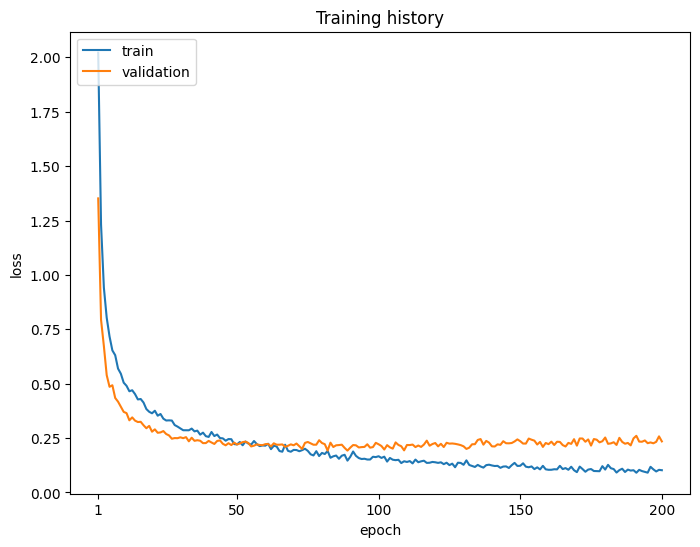

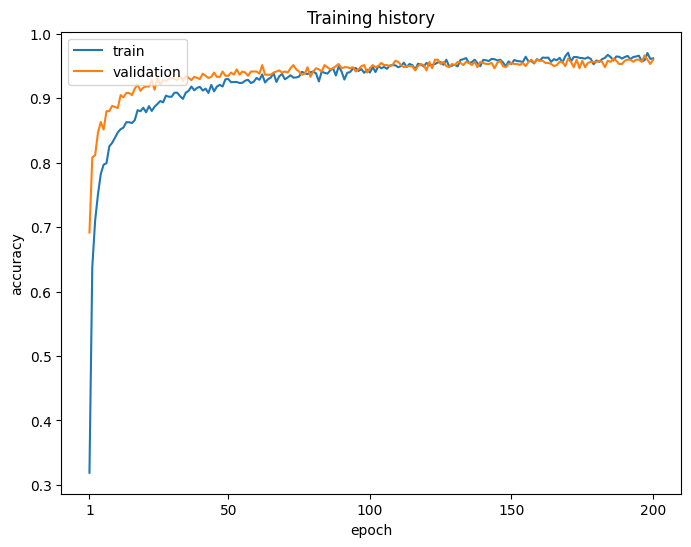

In [82]:
plot_history(history)

In [85]:
pred = model.predict(dig_test['data'])

evaluate_classification_result(dig_test['target'], pred, classes=dig_test['target_names'])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step 
Confusion matrix (rows -> true, columns -> predicted):

     0    1    2    3    4    5    6    7    8    9
0  207    2    0    0    2    0    0    0    0    1
1    0  193    1    0    1    0    0    4    2    2
2    0    1  183    0    0    0    1    0    0    1
3    2    1    1  184    1    4    0    4    1    4
4    0    2    0    0  202    0    1    1    1    1
5    0    2    0    1    1  179    4    0    1    2
6    2    3    0    0    2    3  193    0    1    0
7    0    0    2    3    0    0    0  191    0    6
8    3    7    0    4    4    3    1    1  169    1
9    3    1    1    1    3    5    0    1    1  188


Class 0:
    Sensitivity (TPR):  97.642% (207 of 212)
    Specificity (TNR):  99.442% (1782 of 1792)
    Precision:          95.392% (207 of 217)
    Neg. pred. value:   99.720% (1782 of 1787)
Class 1:
    Sensitivity (TPR):  95.074% (193 of 203)
    Specificity (TNR):  98.945% (1782 of 1801)
    Precision:          91.038% (1

In [1]:
!jupyter nbconvert --to html Ex2_Grimm.ipynb

[NbConvertApp] Converting notebook Ex2_Grimm.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1069604 bytes to Ex2_Grimm.html
